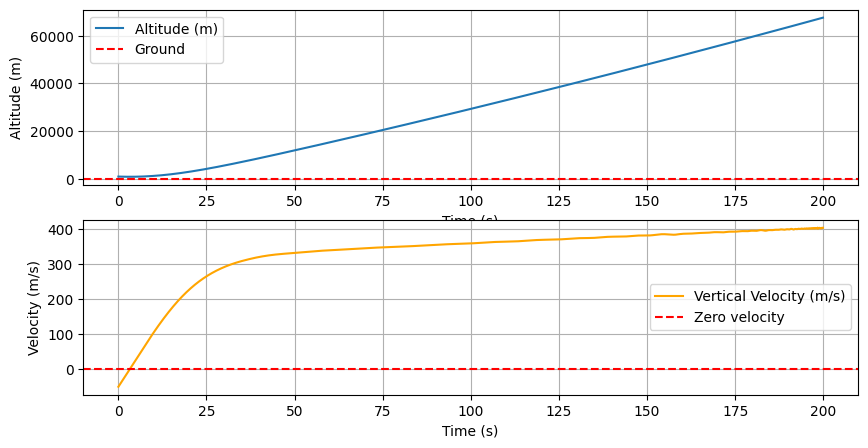

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Gravity (m/s^2)
rho = 1.225  # Air density (kg/m^3)
Cd = 0.5  # Drag coefficient
Cl = 0.0  # Lift coefficient (assume no lift for simplicity)
A = 10.0  # Cross-sectional area (m^2)
Ixx = 20000  # Moment of inertia (kg*m^2)
Iyy = 20000
Izz = 20000
T_max = 500000  # Max thrust (N)
m_initial = 20000  # Initial mass (kg)
burn_rate = 100  # Fuel consumption rate (kg/s)
dt = 0.1  # Time step (s)

def rocket_dynamics(t, state):
    x, y, z, vx, vy, vz, phi, theta, psi, p, q, r, m = state  # Unpack state

    # Atmospheric drag
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    D = 0.5 * rho * v**2 * Cd * A  # Drag force
    Fx = -D * (vx / v) if v != 0 else 0
    Fy = -D * (vy / v) if v != 0 else 0
    Fz = -D * (vz / v) if v != 0 else 0

    # Thrust vectoring (simple PID-like control)
    thrust = min(T_max, 300000 + 5000 * (z - 10))  # Thrust modulation
    if z < 100:  # Soft landing control
        thrust = min(thrust, T_max * 0.2)

    Tx = 0  # Assume vertical thrust for now
    Ty = 0
    Tz = thrust

    # Gravity force
    Fgx = 0
    Fgy = 0
    Fgz = -m * g

    # Total forces
    ax = (Fx + Tx) / m
    ay = (Fy + Ty) / m
    az = (Fz + Tz + Fgz) / m

    # Moments (assuming thrust vectoring for attitude control)
    Mx = -q * Ixx * 0.1  # Damping for roll
    My = -p * Iyy * 0.1  # Damping for pitch
    Mz = -r * Izz * 0.1  # Damping for yaw

    # Angular acceleration
    alpha_x = Mx / Ixx
    alpha_y = My / Iyy
    alpha_z = Mz / Izz

    # Return derivatives
    return [vx, vy, vz, ax, ay, az, p, q, r, alpha_x, alpha_y, alpha_z, -burn_rate]

# Initial conditions (starting at 1000m altitude)
state0 = [0, 0, 1000, 0, 0, -50, 0, 0, 0, 0, 0, 0, m_initial]

# Solve the ODEs
t_span = (0, 200)
t_eval = np.arange(0, 200, dt)
sol = solve_ivp(rocket_dynamics, t_span, state0, t_eval=t_eval, method='RK45')

# Extract solution
time = sol.t
z_pos = sol.y[2]
z_vel = sol.y[5]

# Plot results
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(time, z_pos, label="Altitude (m)")
plt.axhline(0, color='red', linestyle="--", label="Ground")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(time, z_vel, label="Vertical Velocity (m/s)", color='orange')
plt.axhline(0, color='red', linestyle="--", label="Zero velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()

plt.show()
